In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df=pd.read_csv('Bank_Data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
count=0
for i in df['ApplicantIncome']:
    count=count+1
    if i==150:
        print(i,count)

150 217


In [82]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [83]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [84]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [85]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [87]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
df=df.dropna()

In [89]:
df['LoanAmount'].mean()

144.73541666666668

In [90]:
# fill the missing values for numerical terms - mean/mode
#df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
#df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
#df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [91]:
df['Gender'].mode()[0]


'Male'

In [92]:
# fill the missing values for categorical terms - mode
#df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
#df['Married']=df['Married'].fillna(df['Married'].mode()[0])
#df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
#df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [93]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encoding

In [94]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for x in cols:
    print(df[x].value_counts())

Male      394
Female     86
Name: Gender, dtype: int64
Yes    311
No     169
Name: Married, dtype: int64
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
No     414
Yes     66
Name: Self_Employed, dtype: int64
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64
Y    332
N    148
Name: Loan_Status, dtype: int64


In [95]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [96]:
# replacing the value of 3+ to 4
df=df.replace(to_replace='3+',value='4')

In [97]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [98]:
#le=LabelEncoder()
#for col in cols:
    #df[col]=le.fit_transform(df[col])

In [99]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [100]:
df['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [101]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

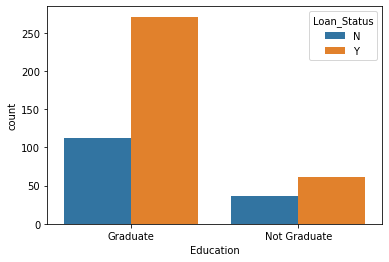

In [102]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

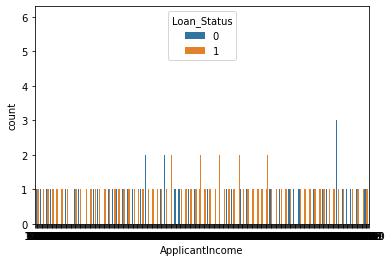

In [156]:
sns.countplot(x='ApplicantIncome',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

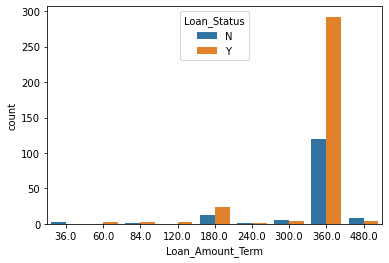

In [103]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

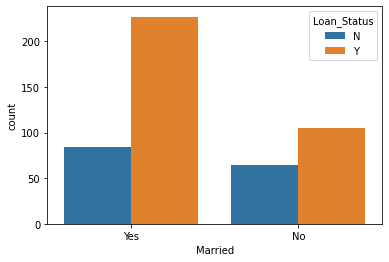

In [104]:
# marital status and loan_status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

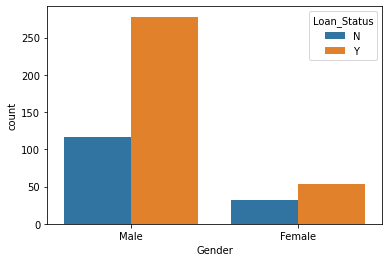

In [105]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

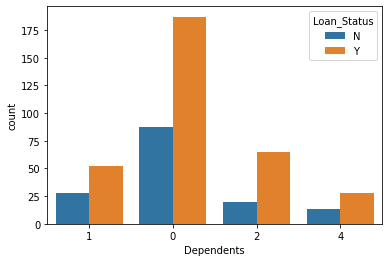

In [106]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

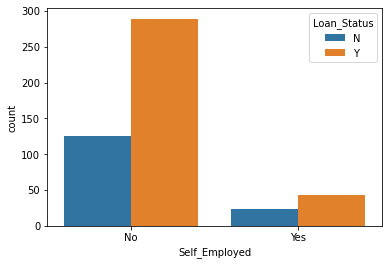

In [107]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

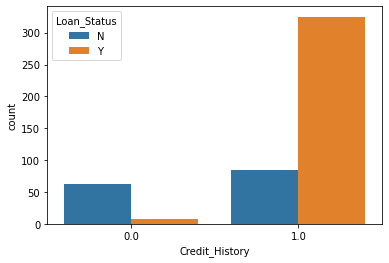

In [108]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

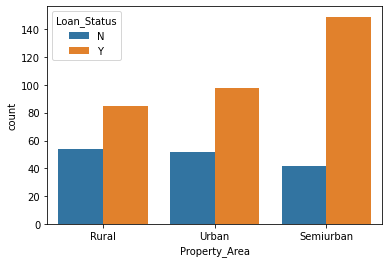

In [109]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

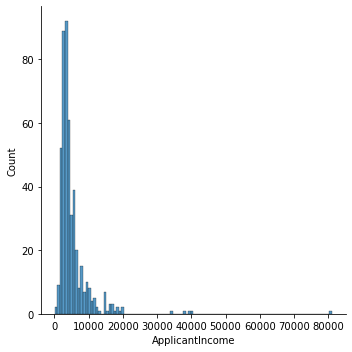

In [110]:
sns.displot(df['ApplicantIncome'])

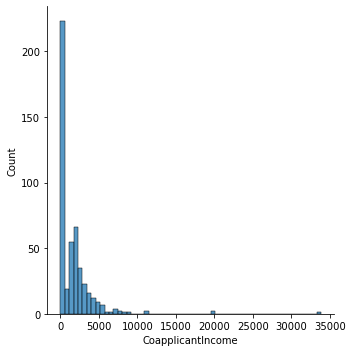

In [111]:
sns.displot(df['CoapplicantIncome'])

In [112]:
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [113]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [114]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df[['Loan_Status']]

In [115]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [116]:
y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


## Train Test Split

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [118]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


## Training

In [119]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

<ipython-input-119-f621451d02aa>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier()

## Accuracy score on Training Data

In [120]:
from sklearn.metrics import accuracy_score
yt_pred=model.predict(X_train)
accuracy_score(yt_pred,Y_train)#clearly overfitted

1.0

In [121]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [122]:
yt_pred=model2.predict(X_train)
accuracy_score(yt_pred,Y_train)#clearly overfitted

1.0

In [123]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()
model3.fit(X_train,Y_train)

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [124]:
yt_pred=model3.predict(X_train)
accuracy_score(yt_pred,Y_train)# not 0verfitted

0.796875

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier()
model4.fit(X_train,Y_train)
yt_pred=model4.predict(X_train)
accuracy_score(yt_pred,Y_train)# not 0verfitted

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.90625

## test accuracy

## random forest

In [126]:
y_pred=model.predict(X_test)
accuracy_score(y_pred,Y_test)

0.8125

## decision tree

In [127]:
y_pred2=model2.predict(X_test)
accuracy_score(y_pred2,Y_test)

0.7395833333333334

## GaussianNB

In [128]:
y_pred3=model3.predict(X_test)
accuracy_score(y_pred3,Y_test)

0.8020833333333334

In [129]:
y_pred4=model4.predict(X_test)
accuracy_score(y_pred4,Y_test)

0.8333333333333334

## Implementing stacking Manually

In [135]:
model=RandomForestClassifier(n_estimators=5)
model2=DecisionTreeClassifier()
model3=GaussianNB()
model4=GradientBoostingClassifier()

In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [137]:
Y_train.value_counts()

Loan_Status
1              249
0              111
dtype: int64

In [138]:
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,n_fold):
    folds=StratifiedKFold(n_splits=n_fold)
    train_pred=np.empty((0,1),int)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        print(x_train,x_val)#x_val=x_test
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        print(y_train,y_val)#y_val=y_test
        model.fit(x_train,y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        print(train_pred)

    return train_pred

In [139]:
train_pred_1=Stacking(model=model,n_fold=5, train=X_train,y=Y_train)
train_pred_2=Stacking(model=model2,n_fold=5, train=X_train,y=Y_train)
train_pred_3=Stacking(model=model3,n_fold=5,  train=X_train,y=Y_train)
train_pred_4=Stacking(model=model4,n_fold=5,  train=X_train,y=Y_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
390       1        0           3          0              0             9167   
562       1        1           0          0              0             5923   
266       1        1           2          0              0             4708   
424       1        1           0          0              0            14880   
55        1        1           2          0              0             2708   
..      ...      ...         ...        ...            ...              ...   
566       1        0           0          0              0             3333   
339       0        0           0          0              0             4160   
89        1        1           0          0              0             5695   
577       1        0           0          0              0             3229   
28        1        0           0          1              0             1442   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

<ipython-input-138-a2d016ec1c57>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-138-a2d016ec1c57>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-138-a2d016ec1c57>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-138-a2d016ec1c57>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-138-a2d016ec1c57>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
168       1        0           0          0              0             2237   
94        1        0           0          1              0             3620   
14        1        1           2          0              0             1299   
20        1        1           0          1              0             7660   
394       1        1           2          0              0             3100   
..      ...      ...         ...        ...            ...              ...   
566       1        0           0          0              0             3333   
339       0        0           0          0              0             4160   
89        1        1           0          0              0             5695   
577       1        0           0          0              0             3229   
28        1        0           0          1              0             1442   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1]
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
168       1        0           0          0              0             2237   
94        1        0           0          1              0             3620   
14        1        1           2          0              0             1299   
20        1        1           0          1              0             7660   
394       1        1           2          0              0             3100   
..      ...      ...         ...        ...            ...              ...   
566       1        0           0          0              0             3333   
339       0        0           0          0              0             4160   
89        1        1           0          0              0             5695   
577       1        0           0          0              0     

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1]
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
168       1        0           0          0              0             2237   
94        1        0           0          1              0             3620   
14        1        1           2          0              0             1299   
20        1        1           0          1              0             7660   
394       1        1

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [140]:
# convert into dataframe for later use
train_pred_1=pd.DataFrame(train_pred_1)
train_pred_2=pd.DataFrame(train_pred_2)
train_pred_3=pd.DataFrame(train_pred_3)
train_pred_4=pd.DataFrame(train_pred_4)

In [141]:
train_data_meta = pd.concat([train_pred_1, train_pred_2,train_pred_3,train_pred_4], axis=1)
#train_data_meta = pd.concat([train_pred_1,train_pred_3,train_pred_4], axis=1)
train_data_meta

,0,0,0,0
0,0,0,0,0
1,1,1,0,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
355,0,0,1,1
356,1,1,1,0
357,1,1,1,1
358,1,0,1,1


In [142]:

meta_model = LogisticRegression()

meta_model.fit(train_data_meta,Y_train)

C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [143]:
model=RandomForestClassifier()
model2=DecisionTreeClassifier()
model3=GaussianNB()
model4=GradientBoostingClassifier()

In [144]:
model.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model4.fit(X_train,Y_train)

<ipython-input-144-dd2a3e172590>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Engineer Sameer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [145]:
y1_pred=model.predict(X_test)
y2_pred=model2.predict(X_test)
y3_pred=model3.predict(X_test)
y4_pred=model4.predict(X_test)

In [146]:
y1_pred=pd.DataFrame(y1_pred)
y2_pred=pd.DataFrame(y2_pred)
y3_pred=pd.DataFrame(y3_pred)
y4_pred=pd.DataFrame(y4_pred)

In [147]:
test_res = pd.concat([y1_pred, y2_pred, y3_pred,y4_pred], axis=1)

In [148]:
test_res

,0,0,0,0
0,0,0,0,0
1,0,0,0,1
2,1,1,1,1
3,1,0,1,1
4,1,1,1,1
...,...,...,...,...
115,1,1,1,1
116,1,1,1,1
117,1,1,1,1
118,1,0,1,1


## Stacked Model

In [149]:
meta_model.score(test_res,Y_test)#test accuracy

0.8416666666666667

In [150]:
import pickle

In [151]:
pickle.dump(meta_model,open('StackModel.pkl','wb'))

In [152]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
122,0,0,0,0,0,2137,8980.0,137.0,360.0,0.0,1
253,1,1,1,1,0,2661,7101.0,279.0,180.0,1.0,1
26,1,1,0,0,0,2799,2253.0,122.0,360.0,1.0,1
312,0,0,0,0,0,2507,0.0,56.0,360.0,1.0,0
422,1,1,0,0,0,1820,1719.0,100.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
406,1,1,0,1,0,2167,2400.0,115.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
560,1,1,2,1,0,3675,242.0,108.0,360.0,1.0,1
65,1,1,0,0,0,5726,4595.0,258.0,360.0,1.0,1


In [153]:
Y_test

,Loan_Status
122,1
253,1
26,1
312,1
422,1
...,...
406,1
3,1
560,1
65,0


In [154]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(model2,open('model2.pkl','wb'))
pickle.dump(model3,open('model3.pkl','wb'))
pickle.dump(model4,open('model4.pkl','wb'))

In [186]:
c=0
li=[]
for x in df['Credit_History']:
    c=c+1
    if x==0 and df.iloc[c-1]['Loan_Status']==1:
        print(df.iloc[c-1,:])


Loan_ID              LP001431
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome          2137
CoapplicantIncome      8980.0
LoanAmount              137.0
Loan_Amount_Term        360.0
Credit_History            0.0
Property_Area               1
Loan_Status                 1
Name: 122, dtype: object
Loan_ID              LP001536
Gender                      1
Married                     1
Dependents                  3
Education                   0
Self_Employed               0
ApplicantIncome         39999
CoapplicantIncome         0.0
LoanAmount              600.0
Loan_Amount_Term        180.0
Credit_History            0.0
Property_Area               1
Loan_Status                 1
Name: 155, dtype: object
Loan_ID              LP001677
Gender                      1
Married                     0
Dependents                  2
Education                   0
Self_Employed       

In [180]:
df.iloc[6,:]['Loan_Status']

0